# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Muttakin
- **Email:** mc308d5y2291@student.devacademy.id
- **ID Dicoding:** MC308D5Y2291

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda berdasarkan musim?
- Bagaimana perbedaan penyewaan sepeda pada hari kerja dan hari libur?
- Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?
- Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('/content/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Kode tersebut membaca dataset day.csv dan hour.csv menggunakan pandas, lalu menampilkan lima baris pertama dari masing-masing dataset. Dataset day.csv berisi data harian, sedangkan hour.csv berisi data per jam, yang dapat dianalisis lebih lanjut untuk memahami pola sewa sepeda berdasarkan waktu.

### Assessing Data

#### Assessing Data day

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kolom dteday harus dikonversi ke tipe datetime agar sesuai dengan format tanggal. Dengan tipe datetime, analisis waktu menjadi lebih efisien dan akurat.

In [5]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Dataset day tidak memiliki data kosong, sehingga dapat langsung digunakan untuk analisis.

In [6]:
day.duplicated().sum()

0

Dataset day tidak mengandung data duplikat, sehingga setiap entri bersifat unik dan tidak ada pencatatan ganda. Hal ini memastikan bahwa analisis yang dilakukan tidak terpengaruh oleh data redundan, sehingga hasilnya lebih akurat dan reliabel.

In [7]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dataset day tidak memiliki data kosong atau duplikat, sehingga siap digunakan untuk analisis lebih lanjut. Selain itu, nilai-nilai statistik yang ditampilkan menunjukkan distribusi data yang wajar tanpa indikasi anomali.

#### Assessing Data hour

In [8]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama seperti data day, kolom dteday harus dikonversi ke tipe datetime agar sesuai dengan format tanggal. Dengan tipe datetime, analisis waktu menjadi lebih efisien dan akurat.

In [9]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Dataset hour tidak memiliki data kosong, sehingga dapat langsung digunakan untuk analisis.

In [10]:
hour.duplicated().sum()

0

Dataset hour tidak mengandung data duplikat, sehingga setiap entri bersifat unik dan tidak ada pencatatan ganda. Hal ini memastikan bahwa analisis yang dilakukan tidak terpengaruh oleh data redundan, sehingga hasilnya lebih akurat dan reliabel.

In [11]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dataset hour tidak memiliki data kosong atau duplikat, sehingga siap digunakan untuk analisis lebih lanjut. Selain itu, nilai-nilai statistik yang ditampilkan menunjukkan distribusi data yang wajar tanpa indikasi anomali.

### Cleaning Data

#### Cleaning Data day

In [13]:
day = day.drop(columns=['instant', 'windspeed'])

day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,total
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


Kolom instant, dan windspeed dihapus karena dianggap tidak relevan untuk analisis yang akan dilakukan. Menghapus kolom yang tidak diperlukan membantu menyederhanakan dataset, meningkatkan efisiensi pemrosesan, dan fokus pada fitur yang lebih berpengaruh terhadap hasil analisis.

In [14]:
day.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  total       731 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 80.1+ KB


Mengubah nama kolom bertujuan untuk membuat dataset lebih mudah dipahami dan dianalisis. Dengan nama yang lebih jelas, interpretasi data menjadi lebih intuitif tanpa perlu menebak arti dari setiap kolom.

In [15]:
#mapping kolom season
mapping_season = {
    1: 'springer', 2: 'summer',
    3: 'fall', 4: 'winter'
}
day['season'] = day['season'].map(mapping_season)

#mapping kolom tahun
mapping_year = {0: 2011, 1: 2012}
day['year'] = day['year'].map(mapping_year)

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day['month'] = day['month'].map(mapping_month)

#mapping kolom weather
mapping_weather = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day['weather'] = day['weather'].map(mapping_weather)


day.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,total
0,2011-01-01,springer,2011,Jan,0,6,0,Mist,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,springer,2011,Jan,0,0,0,Mist,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,springer,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,springer,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,springer,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,82,1518,1600


Mengubah format numerikal menjadi format sebenarnya agar mudah dipahami

In [16]:
day["date"] = pd.to_datetime(day["date"])

Memperbaiki tipe data date

In [17]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   year        731 non-null    int64         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  casual      731 non-null    int64         
 12  registered  731 non-null    int64         
 13  total       731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(3)
memory usage: 80.1+ KB


Dataset day telah diperbaiki dengan menghapus kolom yang tidak relevan dan mengganti nama kolom agar lebih mudah dipahami.

#### Cleaning Data hour

In [18]:
hour = hour.drop(columns=['instant','windspeed'])

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


Kolom instant, dan windspeed dihapus karena dianggap tidak relevan untuk analisis yang akan dilakukan. Menghapus kolom yang tidak diperlukan membantu menyederhanakan dataset, meningkatkan efisiensi pemrosesan, dan fokus pada fitur yang lebih berpengaruh terhadap hasil analisis.

In [19]:
hour.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total'
}, inplace=True)

hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,total
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,1,1


Mengubah nama kolom bertujuan untuk membuat dataset lebih mudah dipahami dan dianalisis. Dengan nama yang lebih jelas, interpretasi data menjadi lebih intuitif tanpa perlu menebak arti dari setiap kolom.

In [20]:
#mapping kolom season
mapping_season = {
    1: 'springer', 2: 'summer',
    3: 'fall', 4: 'winter'
}
hour['season'] = hour['season'].map(mapping_season)

#mapping kolom tahun
mapping_year = {0: 2011, 1: 2012}
hour['year'] = hour['year'].map(mapping_year)

#mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'
}
hour['month'] = hour['month'].map(mapping_month)

#mapping kolom weather
mapping_weather = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
hour['weather'] = hour['weather'].map(mapping_weather)


hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,total
0,2011-01-01,springer,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0,1,1


Mengubah format numerikal menjadi format sebenarnya agar mudah dipahami

In [21]:
hour["date"] = pd.to_datetime(hour["date"])

In [22]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  int64         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weather     17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  total       17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8), object(3)
memory usage: 2.

Dataset day telah diperbaiki dengan menghapus kolom yang tidak relevan dan mengganti nama kolom agar lebih mudah dipahami.

In [25]:
day.to_csv("pre_day.csv", index=False)
hour.to_csv("pre_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore tabel

In [30]:
df_day = pd.read_csv('/content/pre_day.csv')
df_day.head()

df_hour = pd.read_csv('/content/pre_hour.csv')
df_hour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,casual,registered,total
0,2011-01-01,springer,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,3,13,16
1,2011-01-01,springer,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,8,32,40
2,2011-01-01,springer,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,5,27,32
3,2011-01-01,springer,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,3,10,13
4,2011-01-01,springer,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0,1,1


In [27]:
# 1. Tren jumlah penyewaan sepeda berdasarkan musim
seasonal_trend = df_day.groupby("season")["total"].mean().sort_values()

# Menampilkan dalam bentuk tabel
df_seasonal_trend = pd.DataFrame({'Season': seasonal_trend.index, 'Avg Rentals': seasonal_trend.values})
display(df_seasonal_trend)

,Season,Avg Rentals
0,springer,2604.132597
1,winter,4728.162921
2,summer,4992.331522
3,fall,5644.303191


Analisis ini menunjukkan tren rata-rata penyewaan sepeda berdasarkan musim, dengan menghitung nilai rata-rata dari kolom total untuk setiap season. Hasilnya membantu memahami pola permintaan sepeda sepanjang tahun, yang dapat digunakan untuk perencanaan operasional dan strategi bisnis.

In [28]:
# 2. Perbedaan penyewaan sepeda pada hari kerja dan hari libur
workday_trend = df_day.groupby("workingday")["total"].mean()

df_workday_trend = pd.DataFrame({'Working Day': ["Libur", "Hari Kerja"], 'Avg Rentals': workday_trend.values})
display(df_workday_trend)

,Working Day,Avg Rentals
0,Libur,4330.168831
1,Hari Kerja,4584.820000


Analisis ini membandingkan rata-rata penyewaan sepeda pada hari kerja dan hari libur untuk melihat perbedaan tren penggunaan. Hasilnya dapat memberikan wawasan tentang pola mobilitas pengguna, seperti apakah sepeda lebih banyak digunakan untuk keperluan komuter atau rekreasi.

In [31]:
# 3. Pola penyewaan sepeda berdasarkan jam dalam sehari
hourly_trend = df_hour.groupby("hour")["total"].mean()

df_hourly_trend = pd.DataFrame({'Hour': hourly_trend.index, 'Avg Rentals': hourly_trend.values})
display(df_hourly_trend)

,Hour,Avg Rentals
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Analisis ini menunjukkan pola rata-rata penyewaan sepeda berdasarkan jam dalam sehari untuk mengidentifikasi jam-jam dengan penggunaan tertinggi. Wawasan ini dapat membantu dalam pengelolaan armada sepeda serta memahami kapan permintaan mencapai puncaknya.

In [36]:
# 4. Pengaruh cuaca terhadap jumlah penyewaan sepeda
weather_trend = df_day.groupby("weather")["total"].mean()

df_weather_trend = pd.DataFrame({'Weather': weather_trend.index, 'Avg Rentals': weather_trend.values})
display(df_weather_trend)

,Weather,Avg Rentals
0,Clear,4876.786177
1,Light Rain/Snow,1803.285714
2,Mist,4035.862348


Analisis ini mengidentifikasi bagaimana kondisi cuaca memengaruhi rata-rata jumlah penyewaan sepeda. Hasilnya dapat membantu dalam memahami pola penggunaan sepeda serta merencanakan strategi operasional berdasarkan faktor cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah penyewaan sepeda berdasarkan musim?

<ipython-input-32-bdcee543a9b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette="viridis")


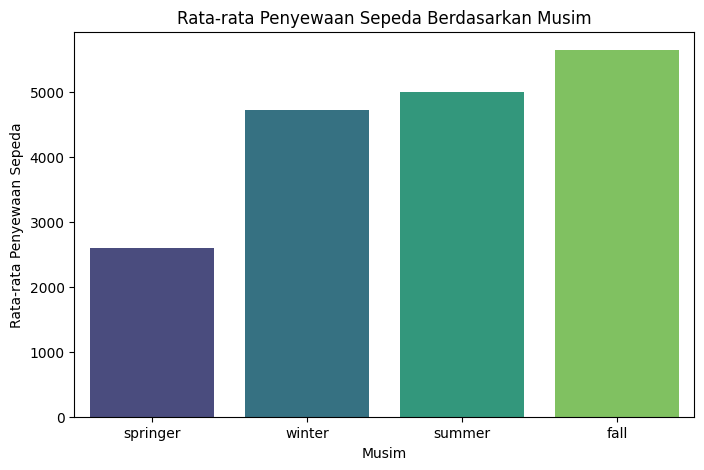

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_trend.index, y=seasonal_trend.values, palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.show()

Grafik ini menunjukkan rata-rata penyewaan sepeda berdasarkan musim, di mana jumlah penyewaan tertinggi terjadi pada musim gugur (fall) dan terendah pada musim semi (spring). Tren ini mengindikasikan bahwa faktor musim berpengaruh terhadap tingkat penggunaan sepeda, kemungkinan dipengaruhi oleh kondisi cuaca dan kenyamanan bersepeda di setiap musim.

### Pertanyaan 2: Bagaimana perbedaan penyewaan sepeda pada hari kerja dan hari libur?

<ipython-input-33-51274a7f8fad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Libur", "Hari Kerja"], y=workday_trend.values, palette="coolwarm")


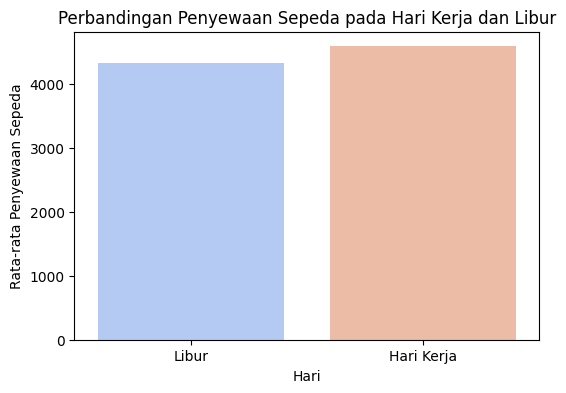

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x=["Libur", "Hari Kerja"], y=workday_trend.values, palette="coolwarm")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda pada Hari Kerja dan Libur")
plt.show()

Grafik ini membandingkan rata-rata penyewaan sepeda pada hari kerja dan hari libur, di mana jumlah penyewaan pada hari kerja sedikit lebih tinggi dibandingkan hari libur. Hal ini menunjukkan bahwa sepeda kemungkinan lebih sering digunakan untuk keperluan komuter dibandingkan rekreasi.

### Pertanyaan 3: Bagaimana pola penyewaan sepeda berdasarkan jam dalam sehari?

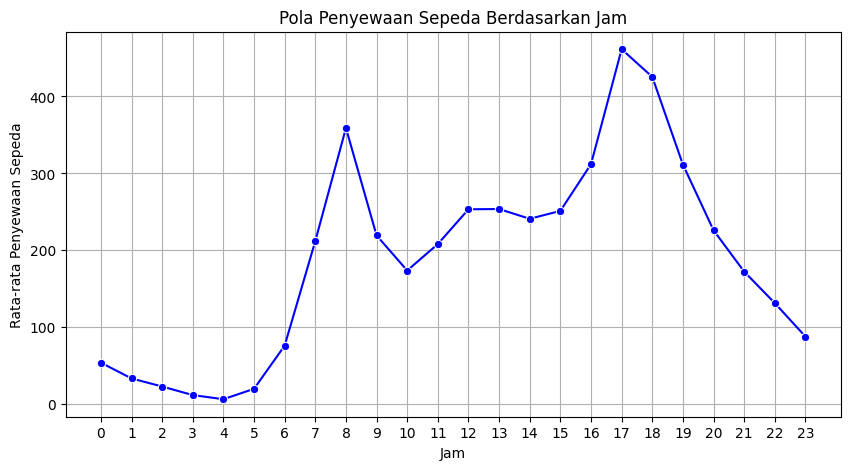

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values, marker="o", color="b")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

Grafik ini menunjukkan pola penyewaan sepeda berdasarkan jam dalam sehari, dengan dua puncak signifikan pada pukul 8 pagi dan 5 sore. Pola ini mengindikasikan bahwa penyewaan sepeda meningkat saat jam berangkat dan pulang kerja, yang menunjukkan penggunaannya banyak dipengaruhi oleh aktivitas komuter.

### Pertanyaan 4: Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

<ipython-input-37-720cb528fdfa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_trend.index, y=weather_trend.values, palette="magma")


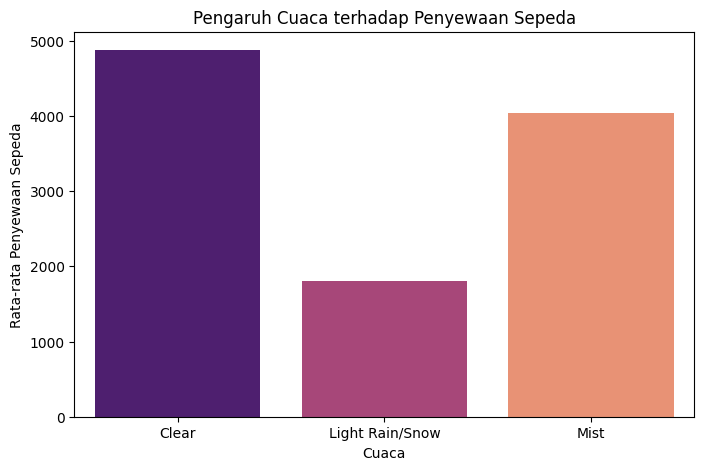

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x=weather_trend.index, y=weather_trend.values, palette="magma")
plt.xlabel("Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.show()

Grafik ini menunjukkan pengaruh cuaca terhadap rata-rata penyewaan sepeda, di mana jumlah penyewaan tertinggi terjadi saat cuaca cerah (Clear) dan terendah saat hujan ringan atau salju (Light Rain/Snow). Hal ini mengindikasikan bahwa kondisi cuaca yang buruk dapat menurunkan minat pengguna dalam menyewa sepeda.

**Conclussion**

- Cuaca berpengaruh terhadap penyewaan sepeda, di mana jumlah penyewaan tertinggi terjadi saat cuaca cerah dan menurun drastis saat hujan ringan atau salju.
- Penyewaan sepeda memiliki pola harian, dengan dua puncak signifikan pada pukul 8 pagi dan 5 sore, menunjukkan bahwa sepeda banyak digunakan untuk aktivitas komuter.
- Hari kerja memiliki jumlah penyewaan lebih tinggi dibandingkan hari libur, yang mengindikasikan bahwa sepeda lebih sering digunakan sebagai alat transportasi daripada untuk rekreasi.
- Musim memengaruhi tingkat penyewaan sepeda, dengan jumlah tertinggi pada musim gugur dan terendah pada musim semi, kemungkinan karena perbedaan kenyamanan dan kondisi cuaca di setiap musim.

## Analisis Lanjutan (Opsional)

<ipython-input-50-8c62a175a8d3>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_cluster_counts.index, y=day_cluster_counts.values, ax=axes[0], palette='coolwarm')
<ipython-input-50-8c62a175a8d3>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intensity_cluster_counts.index, y=intensity_cluster_counts.values, ax=axes[1], palette='magma')


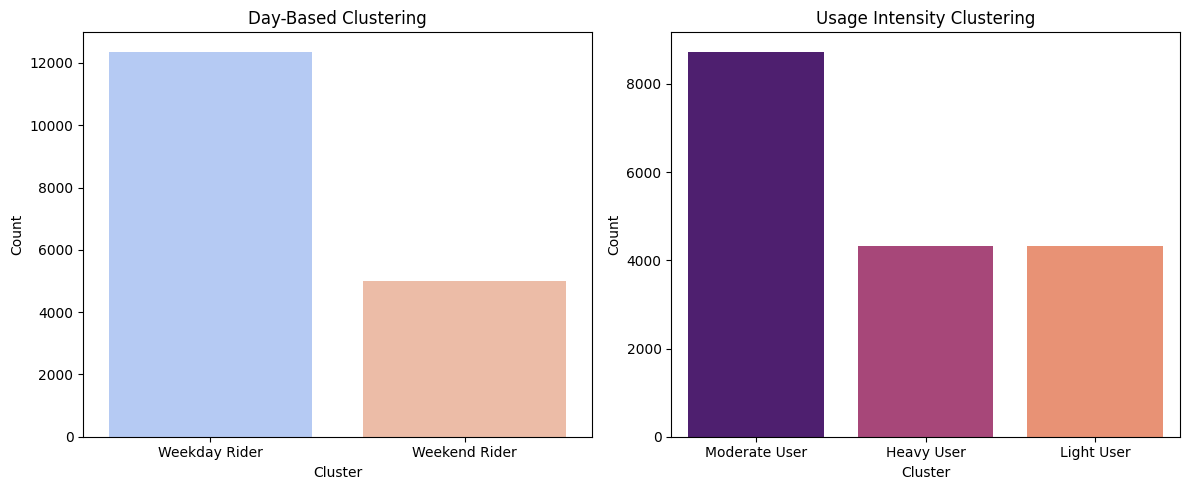

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load hourly dataset
file_path_hour = "/content/pre_hour.csv"
df_hour = pd.read_csv(file_path_hour)

# Convert 'date' column to datetime format
df_hour['date'] = pd.to_datetime(df_hour['date'])

# Extract day of the week for analysis
df_hour['day_of_week'] = df_hour['date'].dt.dayofweek  # Monday = 0, Sunday = 6

# Rule-Based Clustering (without time-based clustering)

def classify_day_based(row):
    return 'Weekend Rider' if row['day_of_week'] in [5, 6] else 'Weekday Rider'

# Define usage intensity based on quartiles
usage_quantiles = df_hour['total'].quantile([0.25, 0.75])
def classify_intensity(row):
    if row['total'] > usage_quantiles[0.75]:
        return 'Heavy User'
    elif row['total'] < usage_quantiles[0.25]:
        return 'Light User'
    else:
        return 'Moderate User'

df_hour['Day_Cluster'] = df_hour.apply(classify_day_based, axis=1)
df_hour['Usage_Intensity'] = df_hour.apply(classify_intensity, axis=1)

# Count users per cluster
day_cluster_counts = df_hour['Day_Cluster'].value_counts()
intensity_cluster_counts = df_hour['Usage_Intensity'].value_counts()

# Plot clustering results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=day_cluster_counts.index, y=day_cluster_counts.values, ax=axes[0], palette='coolwarm')
axes[0].set_title("Day-Based Clustering")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Count")

sns.barplot(x=intensity_cluster_counts.index, y=intensity_cluster_counts.values, ax=axes[1], palette='magma')
axes[1].set_title("Usage Intensity Clustering")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Conclusion

1. Day-Based Clustering (Weekday vs. Weekend Riders)

Mayoritas pengguna adalah Weekday Riders, yang berarti mereka lebih sering melakukan transaksi pada hari kerja.
Pengguna yang bertransaksi di akhir pekan (Weekend Riders) jumlahnya jauh lebih sedikit, yang bisa mengindikasikan bahwa layanan ini lebih sering digunakan untuk aktivitas rutin seperti bekerja atau sekolah.
2. Usage Intensity Clustering (Light, Moderate, Heavy Users)

Moderate Users merupakan kelompok terbesar, menunjukkan bahwa sebagian besar pelanggan menggunakan layanan ini dengan frekuensi menengah.
Heavy Users dan Light Users memiliki jumlah yang hampir sama, yang berarti ada segmen pelanggan yang sangat sering menggunakan layanan dan ada juga yang hanya sesekali.

Insight & Rekomendasi:

Strategi pemasaran bisa lebih difokuskan pada pengguna Weekday dengan promo untuk perjalanan rutin.
Meningkatkan engagement dengan Weekend Riders, misalnya dengan diskon atau promosi khusus akhir pekan.
Memberikan insentif kepada Light Users agar mereka lebih sering menggunakan layanan.
Menganalisis kebutuhan Heavy Users untuk mempertahankan loyalitas mereka, misalnya dengan program loyalitas atau langganan.